CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [186]:
data = pd.read_csv('a4-train.csv', index_col=0)
test_data=pd.read_csv('a4-test.csv', index_col=0)
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1


In [3]:
test_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1


In [4]:
data.isna().sum()


feat_0      0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
feat_5      0
feat_6      0
feat_7      0
feat_8      0
feat_9      0
feat_10     0
feat_11     0
feat_12     0
feat_13     0
feat_14     0
feat_15     0
feat_16     0
feat_17     0
feat_18     0
feat_19     0
feat_20     0
feat_21     0
feat_22     0
feat_23     0
feat_24     0
feat_25     0
feat_26     0
feat_27     0
feat_28     0
feat_29     0
           ..
feat_471    0
feat_472    0
feat_473    0
feat_474    0
feat_475    0
feat_476    0
feat_477    0
feat_478    0
feat_479    0
feat_480    0
feat_481    0
feat_482    0
feat_483    0
feat_484    0
feat_485    0
feat_486    0
feat_487    0
feat_488    0
feat_489    0
feat_490    0
feat_491    0
feat_492    0
feat_493    0
feat_494    0
feat_495    0
feat_496    0
feat_497    0
feat_498    0
feat_499    0
labels      0
Length: 501, dtype: int64

In [5]:
test_data.isna().sum()


feat_0      0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
feat_5      0
feat_6      0
feat_7      0
feat_8      0
feat_9      0
feat_10     0
feat_11     0
feat_12     0
feat_13     0
feat_14     0
feat_15     0
feat_16     0
feat_17     0
feat_18     0
feat_19     0
feat_20     0
feat_21     0
feat_22     0
feat_23     0
feat_24     0
feat_25     0
feat_26     0
feat_27     0
feat_28     0
feat_29     0
           ..
feat_471    0
feat_472    0
feat_473    0
feat_474    0
feat_475    0
feat_476    0
feat_477    0
feat_478    0
feat_479    0
feat_480    0
feat_481    0
feat_482    0
feat_483    0
feat_484    0
feat_485    0
feat_486    0
feat_487    0
feat_488    0
feat_489    0
feat_490    0
feat_491    0
feat_492    0
feat_493    0
feat_494    0
feat_495    0
feat_496    0
feat_497    0
feat_498    0
feat_499    0
labels      0
Length: 501, dtype: int64

In [6]:
columns=data.columns.values
columns

array(['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5',
       'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11',
       'feat_12', 'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17',
       'feat_18', 'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23',
       'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29',
       'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35',
       'feat_36', 'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53',
       'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59',
       'feat_60', 'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65',
       'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71',
       'feat_72', 'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77',
       'feat_78', 'feat_79', 'feat_80', 'feat_81', 'feat_82',

In [7]:
data.shape

(2000, 501)

Task 1: Perform exploratory data analysis (15 points)

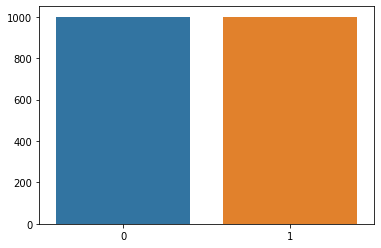

In [14]:
x_axis=list(data.labels.value_counts().index)
y_axis=list(data.labels.value_counts().values)
sns.barplot(x_axis,y_axis)


From the above plot we can deduce that there's an even distribution of samples of both classes in our data-set.

In [15]:
data.corr()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
feat_0,1.000000,0.042789,-0.022897,0.017871,-0.003337,0.017776,0.036649,0.046846,-0.024170,-0.012535,...,0.017542,-0.003865,0.015519,0.007361,-0.034734,0.013165,-0.033386,0.008648,-0.046535,0.002414
feat_1,0.042789,1.000000,-0.008173,0.020494,0.029011,-0.014954,-0.032232,0.020178,0.015920,0.001608,...,0.008182,0.018399,0.026583,-0.002381,0.018728,0.043230,-0.006259,-0.001824,0.041259,0.019003
feat_2,-0.022897,-0.008173,1.000000,-0.009640,0.007198,0.016953,0.004855,-0.018082,-0.004728,-0.018773,...,0.004179,-0.000458,-0.013680,0.009596,0.026388,0.010825,0.037516,0.022287,0.020370,0.011906
feat_3,0.017871,0.020494,-0.009640,1.000000,-0.010786,0.044198,-0.009176,-0.017608,-0.035731,0.010161,...,-0.045861,-0.030744,0.017454,-0.007225,0.013877,-0.010965,-0.003627,-0.014491,-0.000589,-0.002153
feat_4,-0.003337,0.029011,0.007198,-0.010786,1.000000,0.005714,0.009717,0.024661,-0.058043,-0.027877,...,0.003109,-0.039532,-0.013767,0.031348,0.028628,0.053824,0.012479,0.026136,0.010764,0.042497
feat_5,0.017776,-0.014954,0.016953,0.044198,0.005714,1.000000,-0.047054,-0.024812,0.042148,0.022175,...,0.025443,-0.024741,-0.016164,-0.032220,0.028203,0.003333,0.010998,-0.016103,0.017191,-0.031056
feat_6,0.036649,-0.032232,0.004855,-0.009176,0.009717,-0.047054,1.000000,0.026023,-0.008711,-0.024414,...,0.000136,0.013658,-0.015206,0.019108,0.002374,0.031925,-0.027418,0.026832,0.016975,-0.016405
feat_7,0.046846,0.020178,-0.018082,-0.017608,0.024661,-0.024812,0.026023,1.000000,-0.035779,0.016051,...,-0.024678,0.021953,0.008258,0.000431,0.009076,0.016342,0.004899,0.008581,0.014249,0.015172
feat_8,-0.024170,0.015920,-0.004728,-0.035731,-0.058043,0.042148,-0.008711,-0.035779,1.000000,0.002039,...,-0.002311,0.008186,0.027587,-0.013677,-0.008730,-0.032714,-0.009209,0.020083,0.034521,0.009541
feat_9,-0.012535,0.001608,-0.018773,0.010161,-0.027877,0.022175,-0.024414,0.016051,0.002039,1.000000,...,0.000077,0.042103,-0.033364,0.001788,-0.022317,0.073471,-0.001086,0.010612,-0.047127,-0.009459


(1000, 500)
(1000, 500)


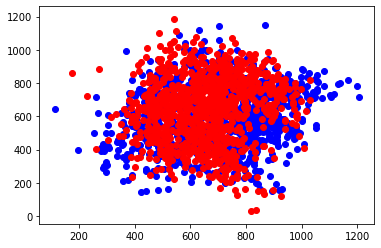

In [22]:
X_train=data.drop(columns='labels',axis=0).values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0).values
Y_test=test_data['labels'].values


#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


#PCA for Data Visualization
from sklearn.decomposition import PCA

positive_samples=data.where(data['labels']==1).dropna()
negative_samples=data.where(data['labels']==0).dropna()
positive_samples=positive_samples.drop(columns='labels',axis=0)
negative_samples=negative_samples.drop(columns='labels',axis=0)


print(positive_samples.shape)
print(negative_samples.shape)
pca=PCA(n_components=2)
PCA_visualize=pca.fit(X_train)
positive_samples=PCA_visualize.transform(positive_samples)
negative_samples=PCA_visualize.transform(negative_samples)
#X_test=pca.transform(X_test)


from matplotlib import pyplot as plt

plt.scatter(positive_samples[:,0],positive_samples[:,1],color='b')
plt.scatter(negative_samples[:,0],negative_samples[:,1],color='r')

Though only a portion of variance is captured by the principal components of the training set, we can expect that the data is not linearly seperable.

Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(X_train,Y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print("Train Accuracy",accuracy_score(y_train_pred,Y_train))
print("Test Accuracy",accuracy_score(y_test_pred,Y_test))

Train Accuracy 0.7405
Test Accuracy 0.58


# With Regularization

0.524
0.5066666666666667


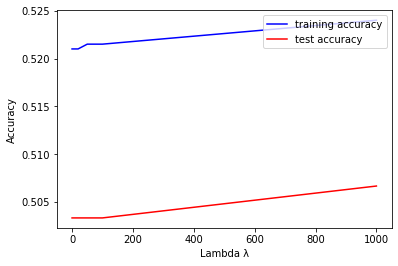

In [34]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

training_scores=[]
test_scores=[]
r_lambda=[0.1,0.5,1.5,3,3.5,5,8,10,15,20,50,100,1000]
for i in r_lambda:
  classifier=LogisticRegression(penalty='l2',C=1/i)
  classifier.fit(X_train,Y_train)
  training_prediction=classifier.predict(X_train)
  test_prediction=classifier.predict(X_test)
  training_scores.append(accuracy_score(training_prediction,Y_train))
  test_scores.append(accuracy_score(test_prediction,Y_test))

print(max(training_scores))
print(max(test_scores))

plt.plot(r_lambda,training_scores,"b",label="training accuracy")
plt.plot(r_lambda,test_scores,"r",label="test accuracy")
plt.xlabel("Lambda λ")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")

Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been convered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [94]:
data = pd.read_csv('a4-train.csv', index_col=0)
test_data=pd.read_csv('a4-test.csv', index_col=0)
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1


In [95]:
test_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1


In [96]:
X_train=data.drop(columns='labels',axis=0).values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0).values
Y_test=test_data['labels'].values

# Feature selection using Random Forest

[0.07039380413419974, 0.06730895822974696, 0.05650083861124846, 0.04907269205067756, 0.047104878201523474, 0.03861436400785164, 0.03702280674369065, 0.03395065398813658, 0.03370831159367466, 0.024426644482209173, 0.0214994930381487, 0.01679743471155175, 0.016318266732065576, 0.011334585772759611, 0.008468112950880673, 0.007189925326954614, 0.0071186712143131705, 0.0069139897988606735, 0.005470490580574121, 0.004928338178097111, 0.004298382054526271, 0.004139918554829167, 0.004125882016126584, 0.003694489515254736, 0.0036937776660434917, 0.0036831751880854417, 0.0035561732963597815, 0.0034387837746616616, 0.00325568891431268, 0.002994054000224335, 0.00296909018590235, 0.002959273822540227, 0.0029207693378746047, 0.0028837276841777292, 0.002788964730238649, 0.002688220684103105, 0.0026338042559062944, 0.002630968472697144, 0.002630126797455511, 0.002622470199122718, 0.0025882842936308273, 0.0025831945805525635, 0.002575254661032398, 0.002561573116056535, 0.002535916723675385, 0.002530381

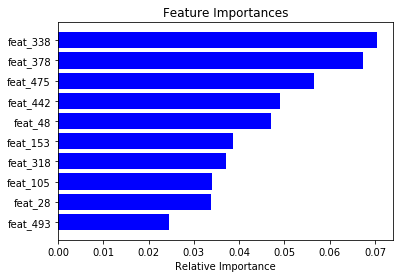

In [97]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, max_depth=10)
model.fit(X_train,Y_train)

features=list(data.columns)
features.remove('labels')
importances = model.feature_importances_
print(sorted(importances,reverse=True))
indices = np.argsort(importances)[-10:]  # top 10 features
feature_selection=[features[i] for i in indices]
print(feature_selection)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Above, I have used the feature importance attribute of Random Forest algorithm in sklearn to filter out the important features from the data-set. In the graph above, I have plotted the relative importance of the top-ten important attributes (as identified by the algorithm) in the data-set. I have used these top ten features (['feat_493', 'feat_28', 'feat_105', 'feat_318', 'feat_153', 'feat_48', 'feat_442', 'feat_475', 'feat_378', 'feat_338']) to build the models below. As, one can observe, all the models performed better after feature selection.

In [98]:
feature_selection=['feat_493', 'feat_28', 'feat_105', 'feat_318', 'feat_153', 'feat_48', 'feat_442', 'feat_475', 'feat_378', 'feat_338']

X_train=data.drop(columns='labels',axis=0)[feature_selection].values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0)[feature_selection].values
Y_test=test_data['labels'].values

In [99]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

0.6045
0.5983333333333334


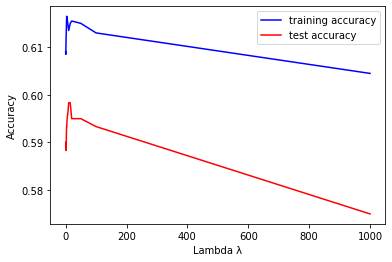

In [100]:
training_scores=[]
test_scores=[]
r_lambda=[0.1,0.5,1.5,3,3.5,5,8,10,15,20,50,100,1000]
for i in r_lambda:
  classifier=LogisticRegression(penalty='l2',C=1/i)
  classifier.fit(X_train,Y_train)
  training_prediction=classifier.predict(X_train)
  test_prediction=classifier.predict(X_test)
  training_scores.append(accuracy_score(training_prediction,Y_train))
  test_scores.append(accuracy_score(test_prediction,Y_test))

print(min(training_scores))
print(max(test_scores))

plt.plot(r_lambda,training_scores,"b",label="training accuracy")
plt.plot(r_lambda,test_scores,"r",label="test accuracy")
plt.xlabel("Lambda λ")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")

Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

# 1) Neural Network

In [140]:
#Neural Network Implementation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense


In [141]:
data = pd.read_csv('a4-train.csv', index_col=0)
test_data=pd.read_csv('a4-test.csv', index_col=0)
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1


In [142]:
test_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1


In [143]:
X_train=data.drop(columns='labels',axis=0).values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0).values
Y_test=test_data['labels'].values

In [144]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


# Following is a baseline model without any feature engineering.

In [145]:
model=Sequential()
model.add(Dense(125, input_dim=500, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [146]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 125)               62625     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4032      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 66,690
Trainable params: 66,690
Non-trainable params: 0
_________________________________________________________________


In [147]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [148]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32)


Epoch 1/100
2000/2000 [==============================] - 0s 178us/step - loss: 0.7218 - accuracy: 0.5325
Epoch 2/100
2000/2000 [==============================] - 0s 63us/step - loss: 0.4719 - accuracy: 0.8320
Epoch 3/100
2000/2000 [==============================] - 0s 68us/step - loss: 0.3154 - accuracy: 0.9290
Epoch 4/100
2000/2000 [==============================] - 0s 66us/step - loss: 0.1813 - accuracy: 0.9775
Epoch 5/100
2000/2000 [==============================] - 0s 78us/step - loss: 0.0909 - accuracy: 0.9955
Epoch 6/100
2000/2000 [==============================] - 0s 85us/step - loss: 0.0440 - accuracy: 0.9995
Epoch 7/100
2000/2000 [==============================] - 0s 83us/step - loss: 0.0225 - accuracy: 1.0000
Epoch 8/100
2000/2000 [==============================] - 0s 81us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 9/100
2000/2000 [==============================] - 0s 84us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 10/100
2000/2000 [==============================] - 0s 81

2000/2000 [==============================] - 0s 68us/step - loss: 7.4171e-06 - accuracy: 1.0000
Epoch 77/100
2000/2000 [==============================] - 0s 62us/step - loss: 7.0621e-06 - accuracy: 1.0000
Epoch 78/100
2000/2000 [==============================] - 0s 63us/step - loss: 6.7321e-06 - accuracy: 1.0000
Epoch 79/100
2000/2000 [==============================] - 0s 63us/step - loss: 6.4148e-06 - accuracy: 1.0000
Epoch 80/100
2000/2000 [==============================] - 0s 63us/step - loss: 6.1160e-06 - accuracy: 1.0000
Epoch 81/100
2000/2000 [==============================] - 0s 62us/step - loss: 5.8354e-06 - accuracy: 1.0000
Epoch 82/100
2000/2000 [==============================] - 0s 66us/step - loss: 5.5679e-06 - accuracy: 1.0000
Epoch 83/100
2000/2000 [==============================] - 0s 68us/step - loss: 5.3133e-06 - accuracy: 1.0000
Epoch 84/100
2000/2000 [==============================] - 0s 70us/step - loss: 5.0715e-06 - accuracy: 1.0000
Epoch 85/100
2000/2000 [========

In [149]:

y_pred = model.predict(X_test)
y_train_pred=model.predict(X_train)
#print(y_pred)
for i in range(0,len(y_pred)):
  if y_pred[i]>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

for i in range(0,len(y_train_pred)):
  if y_train_pred[i]>=0.5:
    y_train_pred[i]=1
  else:
    y_train_pred[i]=0

#print(y_pred)

In [150]:
from sklearn.metrics import accuracy_score

print('Training accuracy',accuracy_score(y_train_pred,Y_train))
print('Test accuracy',accuracy_score(y_pred,Y_test))

Training accuracy 1.0
Test accuracy 0.565


# Feature selection

In [151]:
feature_selection=['feat_493', 'feat_28', 'feat_105', 'feat_318', 'feat_153', 'feat_48', 'feat_442', 'feat_475', 'feat_378', 'feat_338']


X_train=data.drop(columns='labels',axis=0)[feature_selection].values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0)[feature_selection].values
Y_test=test_data['labels'].values

In [152]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# After Feature Selection 

In [153]:
model=Sequential()
model.add(Dense(20, input_dim=10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [154]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [156]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32)


Epoch 1/100
2000/2000 [==============================] - 0s 142us/step - loss: 0.7274 - accuracy: 0.4880
Epoch 2/100
2000/2000 [==============================] - 0s 24us/step - loss: 0.6238 - accuracy: 0.6980
Epoch 3/100
2000/2000 [==============================] - 0s 25us/step - loss: 0.5892 - accuracy: 0.7085
Epoch 4/100
2000/2000 [==============================] - 0s 25us/step - loss: 0.5668 - accuracy: 0.7315
Epoch 5/100
2000/2000 [==============================] - 0s 24us/step - loss: 0.5479 - accuracy: 0.7560
Epoch 6/100
2000/2000 [==============================] - 0s 27us/step - loss: 0.5310 - accuracy: 0.7690
Epoch 7/100
2000/2000 [==============================] - 0s 27us/step - loss: 0.5150 - accuracy: 0.7780
Epoch 8/100
2000/2000 [==============================] - 0s 27us/step - loss: 0.4996 - accuracy: 0.7895
Epoch 9/100
2000/2000 [==============================] - 0s 28us/step - loss: 0.4866 - accuracy: 0.7890
Epoch 10/100
2000/2000 [==============================] - 0s 26

2000/2000 [==============================] - 0s 24us/step - loss: 0.2837 - accuracy: 0.8820
Epoch 80/100
2000/2000 [==============================] - 0s 24us/step - loss: 0.2840 - accuracy: 0.8820
Epoch 81/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2815 - accuracy: 0.8830
Epoch 82/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2818 - accuracy: 0.8800
Epoch 83/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2795 - accuracy: 0.8810
Epoch 84/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2803 - accuracy: 0.8830
Epoch 85/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2805 - accuracy: 0.8870
Epoch 86/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2790 - accuracy: 0.8855
Epoch 87/100
2000/2000 [==============================] - 0s 23us/step - loss: 0.2783 - accuracy: 0.8850
Epoch 88/100
2000/2000 [==============================] - 0s 24us/st

In [157]:
y_pred = model.predict(X_test)
y_train_pred=model.predict(X_train)
#print(y_pred)
for i in range(0,len(y_pred)):
  if y_pred[i]>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

for i in range(0,len(y_train_pred)):
  if y_train_pred[i]>=0.5:
    y_train_pred[i]=1
  else:
    y_train_pred[i]=0

#print(y_pred)

In [158]:
from sklearn.metrics import accuracy_score

print('Training accuracy',accuracy_score(y_train_pred,Y_train))
print('Test accuracy',accuracy_score(y_pred,Y_test))

Training accuracy 0.8945
Test accuracy 0.8583333333333333


# 2) Decision Trees

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [160]:
data = pd.read_csv('a4-train.csv', index_col=0)
test_data=pd.read_csv('a4-test.csv', index_col=0)
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1


In [161]:
test_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1


In [162]:
X_train=data.drop(columns='labels',axis=0).values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0).values
Y_test=test_data['labels'].values

In [163]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Following is a baseline model without any feature engineering

In [164]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dtree_classifier=tree.DecisionTreeClassifier()
dtree_classifier=dtree_classifier.fit(X_train,Y_train)
y_train_pred=dtree_classifier.predict(X_train)
y_test_pred=dtree_classifier.predict(X_test)
print('Training accuracy',accuracy_score(y_train_pred,Y_train))
print('Test accuracy',accuracy_score(y_test_pred,Y_test))

Training accuracy 1.0
Test accuracy 0.73


# Feature selection

In [165]:
feature_selection=['feat_493', 'feat_28', 'feat_105', 'feat_318', 'feat_153', 'feat_48', 'feat_442', 'feat_475', 'feat_378', 'feat_338']


X_train=data.drop(columns='labels',axis=0)[feature_selection].values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0)[feature_selection].values
Y_test=test_data['labels'].values

In [166]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# After Feature selection

In [167]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dtree_classifier=tree.DecisionTreeClassifier()
dtree_classifier=dtree_classifier.fit(X_train,Y_train)
y_train_pred=dtree_classifier.predict(X_train)
y_test_pred=dtree_classifier.predict(X_test)
print('Training accuracy',accuracy_score(y_train_pred,Y_train))
print('Test accuracy',accuracy_score(y_test_pred,Y_test))

Training accuracy 1.0
Test accuracy 0.8333333333333334


# 3) Support Vectors Machine (SVM)

In [168]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [169]:
data = pd.read_csv('a4-train.csv', index_col=0)
test_data=pd.read_csv('a4-test.csv', index_col=0)
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1


In [170]:
test_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1


In [171]:
X_train=data.drop(columns='labels',axis=0).values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0).values
Y_test=test_data['labels'].values

In [172]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Model Without feature selection

In [173]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC()
classifier.fit(X_train,Y_train)
y_train_pred=classifier.predict(X_train)
y_pred=classifier.predict(X_test)
print(accuracy_score(y_train_pred,Y_train))
print(accuracy_score(y_pred,Y_test))

0.9715
0.5816666666666667


# Feature selection

In [174]:
feature_selection=['feat_493', 'feat_28', 'feat_105', 'feat_318', 'feat_153', 'feat_48', 'feat_442', 'feat_475', 'feat_378', 'feat_338']


X_train=data.drop(columns='labels',axis=0)[feature_selection].values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0)[feature_selection].values
Y_test=test_data['labels'].values

In [175]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# After feature selection

In [176]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC()
classifier.fit(X_train,Y_train)
y_train_pred=classifier.predict(X_train)
y_pred=classifier.predict(X_test)
print('Training accuracy',accuracy_score(y_train_pred,Y_train))
print('Test accuracy',accuracy_score(y_pred,Y_test))

Training accuracy 0.87
Test accuracy 0.865


# 4) K- Nearest Neighbours(KNN)

In [177]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [178]:
data = pd.read_csv('a4-train.csv', index_col=0)
test_data=pd.read_csv('a4-test.csv', index_col=0)
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1


In [179]:
test_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1


In [180]:
X_train=data.drop(columns='labels',axis=0).values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0).values
Y_test=test_data['labels'].values

In [181]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


# Without feature selection

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)
Y_train=np.nan_to_num(Y_train)
Y_test=np.nan_to_num(Y_test)

knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)
y_pred_train=knn_classifier.predict(X_train)
y_pred_test=knn_classifier.predict(X_test)

print("Training accuracy",accuracy_score(y_pred_train,Y_train))
print("Test accuracy",accuracy_score(y_pred_test,Y_test))

Training accuracy 0.729
Test accuracy 0.5033333333333333


# Feature selection

In [183]:
feature_selection=['feat_493', 'feat_28', 'feat_105', 'feat_318', 'feat_153', 'feat_48', 'feat_442', 'feat_475', 'feat_378', 'feat_338']
#feature_selection=['feat_255', 'feat_17', 'feat_164', 'feat_275', 'feat_364', 'feat_3', 'feat_4', 'feat_1', 'feat_2', 'feat_0']

X_train=data.drop(columns='labels',axis=0)[feature_selection].values
Y_train=data['labels'].values
X_test=test_data.drop(columns='labels',axis=0)[feature_selection].values
Y_test=test_data['labels'].values

In [184]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# With Feature selection

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)
Y_train=np.nan_to_num(Y_train)
Y_test=np.nan_to_num(Y_test)

knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)
y_pred_train=knn_classifier.predict(X_train)
y_pred_test=knn_classifier.predict(X_test)

print("Training accuracy",accuracy_score(y_pred_train,Y_train))
print("Test accuracy",accuracy_score(y_pred_test,Y_test))

Training accuracy 0.928
Test accuracy 0.91


# Working of Model4-

Above I have implemented the K-Nearest Neighbours(KNN) algorithm using sklearn, for classifying samples into two classes (1 or 0). The “K” is KNN algorithm is the nearest neighbors we wish to take vote from. For example- Here, the default value of K is 5. Now, to classify a data point into either of classes, the algorithm builds a circle with the given data point as center just as big as to enclose only five datapoints. Finally, to make a decision, the algorithm calculates the class majority among these five data points, and it then assigns the given data point based on the majority.

During training, the model builds a decision boundary using the approach discussed above, while during evaluation, the model classifies a data point based the decision boundary.


# Summary

Here's a brief summary of accuracy of models which I implemented-

1) Neural Networks-
a) Without feature engineering- Training Accuracy- 100%, Test Accuracy- 56.5%
b) With feature engineering- Training Accuracy- 89.45%, Test Accuracy- 85.83%

2) Decision Trees-
a) Without feature engineering- Training Accuracy- 100, Test Accuracy-73%
b) With feature engineering- Training Accuracy- 100, Test Accuracy- 83.33%

3) SVM-
a) Without feature engineering- Training Accuracy- 97.15%, Test Accuracy- 58.16%
b) With feature engineering- Training Accuracy- 87%, Test Accuracy- 86.5%

4) KNN-
a) Without feature engineering- Training Accuracy- 72.9%, Test Accuracy- 50.33%
b) With feature engineering- Training Accuracy- 92.8%, Test Accuracy- 91%